In [154]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sb


In [155]:
df = pd.read_csv("./comprar_alquilar.csv")
df.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


In [156]:
y = df['comprar']
x = df.drop(['comprar'], axis=1)

x.head()


,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
0,6000,1000,0,600,50000,400000,0,2,2
1,6745,944,123,429,43240,636897,1,3,6
2,6455,1033,98,795,57463,321779,2,1,8
3,7098,1278,15,254,54506,660933,0,0,3
4,6167,863,223,520,41512,348932,0,0,3


In [157]:
# Normalizar los datos
X_scaled  = StandardScaler().fit_transform(x)
X_scaled  = pd.DataFrame(X_scaled )
X_scaled .describe()


,0,1,2,3,4,5,6,7,8
count,2.020000e+02,2.020000e+02,2.020000e+02,2.020000e+02,2.020000e+02,2.020000e+02,2.020000e+02,2.020000e+02,2.020000e+02
mean,-1.319077e-16,9.013692e-17,1.143200e-16,-2.462277e-16,8.903769e-17,-1.121215e-16,-2.198461e-18,1.758769e-17,3.627461e-17
std,1.002484e+00,1.002484e+00,1.002484e+00,1.002484e+00,1.002484e+00,1.002484e+00,1.002484e+00,1.002484e+00,1.002484e+00
min,-1.757913e+00,-2.164757e+00,-1.698954e+00,-1.875081e+00,-1.641286e+00,-1.446677e+00,-1.227088e+00,-9.034260e-01,-1.775087e+00
25%,-8.609353e-01,-7.546427e-01,-9.046102e-01,-7.882314e-01,-7.958240e-01,-7.243774e-01,-1.227088e+00,-9.034260e-01,-9.844198e-01
50%,-6.847623e-03,-1.320463e-02,-2.601737e-02,4.218741e-02,-1.308543e-02,-2.393978e-01,-2.963981e-02,-1.705262e-01,2.015810e-01
75%,8.432190e-01,7.134968e-01,8.585932e-01,8.427887e-01,7.736365e-01,5.229031e-01,1.167809e+00,5.623736e-01,9.922482e-01
max,1.802001e+00,2.259925e+00,1.895654e+00,1.864040e+00,1.800253e+00,2.177333e+00,1.167809e+00,2.028173e+00,1.387582e+00


In [158]:
# Aplicar PCA para reducir la dimensionalidad 
# primero calculamos con la misma cantidad de variables
pca = PCA(n_components= 9)
#nombre de las columnas
nombres = df.columns
# Entrenar
pca.fit(X_scaled )
# Obtener los autovalores
autovalores = pca.explained_variance_
# Obtener los autovectores
autovectores = pca.components_

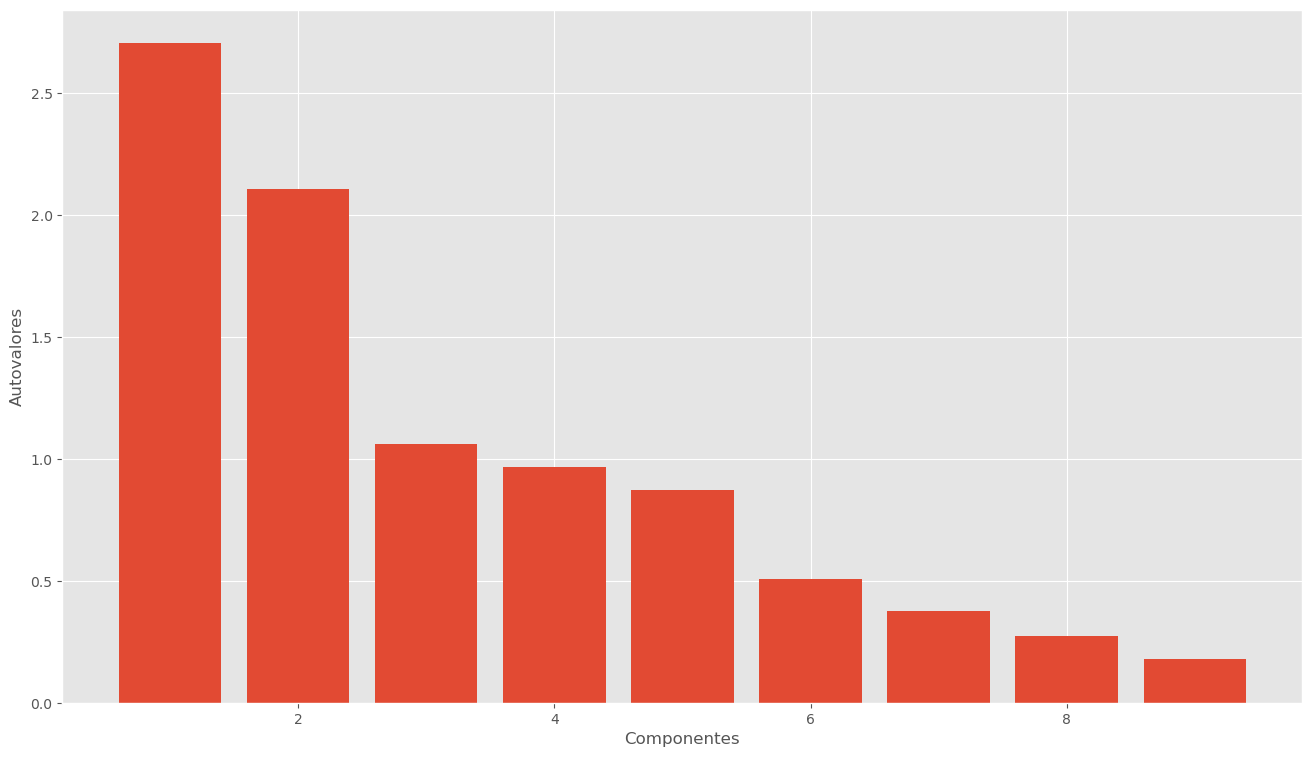

In [159]:
# Graficar los autovalores
plt.bar(range(1,len(autovalores)+1), autovalores)
plt.ylabel('Autovalores')
plt.xlabel('Componentes')
plt.show()


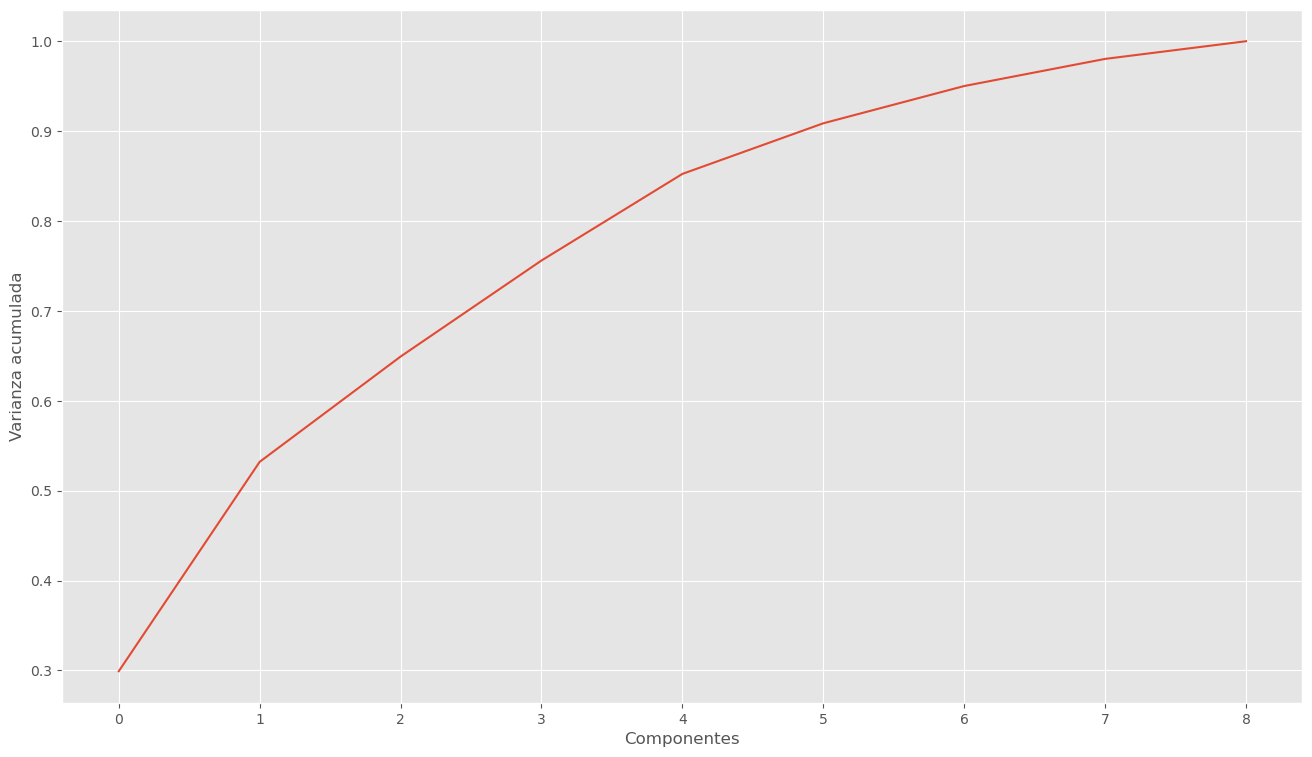

In [160]:
# Graficar la varianza acumulada
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Componentes')
plt.ylabel('Varianza acumulada')
plt.show()


In [179]:
autovectores_df = pd.DataFrame(autovectores)
autovectores_df.columns = nombres[0:9]
autovectores_df


,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
0,-0.493720,-0.318229,0.123771,0.111876,-0.444650,-0.462609,0.252279,0.259859,0.290248
1,0.306959,0.147373,-0.091641,0.000112,0.288435,0.148985,0.469044,0.521894,0.527156
2,0.091419,0.363453,0.516144,-0.701986,-0.191767,-0.140513,0.172885,-0.112184,0.036910
3,0.111222,0.081630,0.780268,0.590704,0.022839,0.150085,-0.007663,0.007404,-0.007493
4,0.088897,0.763006,-0.265554,0.330744,-0.289002,-0.365556,-0.104639,0.043668,0.000009
5,-0.075477,0.067903,-0.153697,0.154422,-0.230181,0.290799,0.767070,-0.387964,-0.256446
6,0.154319,-0.105598,0.027333,0.101876,0.524584,-0.641034,0.212365,-0.460067,0.105053
7,0.012732,-0.010274,0.061759,-0.037977,0.212759,-0.260847,0.204816,0.532216,-0.745630
8,0.776990,-0.374440,-0.048557,0.026631,-0.474168,-0.156101,-0.003289,0.011051,-0.060657


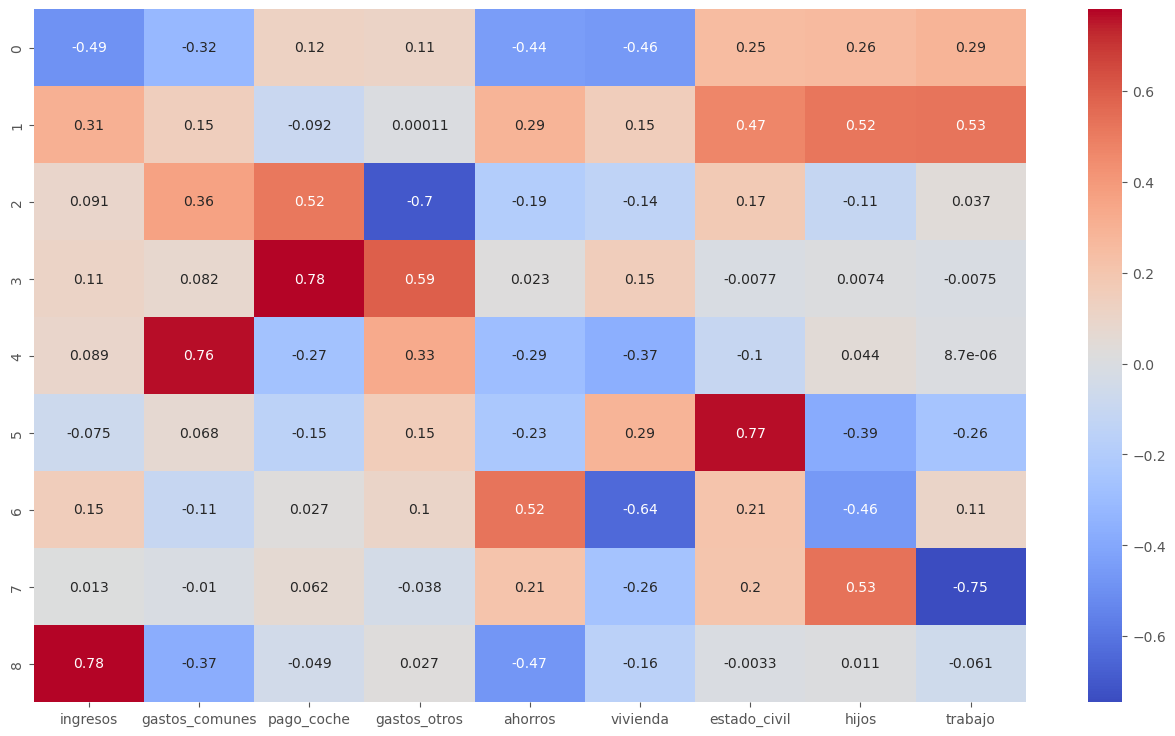

In [180]:
# Relacion entre los datos que quieren decir 
# que son los que tienen mayor peso en la decision
# de comprar o alquilar
sb.heatmap(autovectores_df, cmap='coolwarm', annot=True)
plt.show()

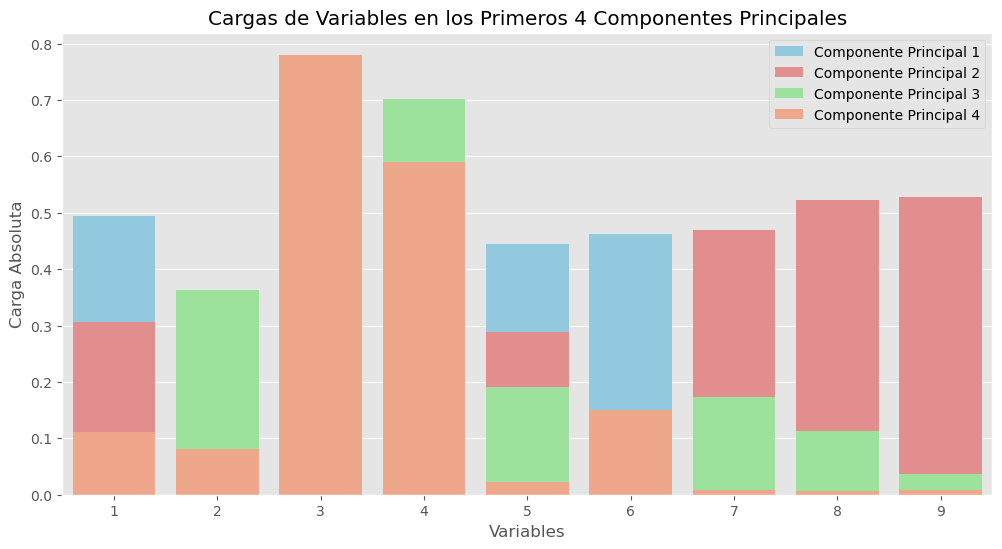

In [163]:
# Visualizar las cargas de las variables en los primeros componentes principales
plt.figure(figsize=(12, 6))
sb.barplot(x=np.arange(1, X_scaled .shape[1] + 1), y=np.abs(autovectores_df.iloc[0]), color='skyblue', label='Componente Principal 1')
sb.barplot(x=np.arange(1, X_scaled .shape[1] + 1), y=np.abs(autovectores_df.iloc[1]), color='lightcoral', label='Componente Principal 2')
sb.barplot(x=np.arange(1, X_scaled  .shape[1] + 1), y=np.abs(autovectores_df.iloc[2]), color='lightgreen', label='Componente Principal 3')
sb.barplot(x=np.arange(1, X_scaled .shape[1] + 1), y=np.abs(autovectores_df.iloc[3]), color='lightsalmon', label='Componente Principal 4')
plt.xlabel('Variables')
plt.ylabel('Carga Absoluta')
plt.title('Cargas de Variables en los Primeros 4 Componentes Principales')
plt.legend()
plt.show()


In [164]:
# Seleccionar las 4 variables más importantes
variables_mas_importantes = autovectores_df.iloc[:, :4].abs().idxmax()
print("Variables más importantes:\n", variables_mas_importantes)

nombre_variables_mas_importantes = nombres[variables_mas_importantes]


Variables más importantes:
 ingresos          8
gastos_comunes    4
pago_coche        3
gastos_otros      2
dtype: int64


In [165]:
# Interpretacion de los componentes principales: Las variables mas importantes son las que tienen mayor peso en los componentes principales, es decir, las que tienen mayor carga absoluta. En este caso, las variables más importantes son: ingresos, gastos comunes, pago del coche y otros tipos de gastos Esto quiere decir que estas variables son las que tienen mayor peso en la decisión de comprar o alquilar una vivienda.

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Dividir los datos en conjuntos de entrenamiento y prueba
X_pca = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Ajustar un modelo predictivo (por ejemplo, Regresión Logística)
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones y evaluar el rendimiento
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)


Exactitud del modelo: 0.9512195121951219


In [171]:
print(X_pca.shape)

(202, 9)
